## import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

## Load Dataset

In [2]:
df = pd.read_csv("all_stocks_5yr.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

## select Portfolio Stocks

In [4]:
stocks = [
     "AAPL", "MSFT", "AMZN", "GOOGL", "META",
    "JPM", "TSLA", "NVDA", "XOM", "PFE"
]

df = df[df["Name"].isin(stocks)]
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["Name","date"])
                            

In [5]:
df.head()

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


## calculate Daily Returns

In [7]:
df["daily_return"] = df.groupby("Name")["close"].pct_change()

returns = df.pivot(
    index="date",
    columns="Name",
    values="daily_return"
)
returns.dropna(inplace=True)
returns.head()

Name,AAPL,AMZN,GOOGL,JPM,MSFT,NVDA,PFE,XOM
date,,,,,,,,
2013-02-11,0.010422,-0.018095,-0.003756,0.000617,0.011252,0.011318,0.009673,-0.003724
2013-02-12,-0.025067,0.005793,-0.002198,0.009864,0.000718,-0.006395,-0.005527,0.002039
2013-02-13,-0.001903,0.041631,0.002767,-0.009361,0.005380,-0.004827,0.000371,0.002374
2013-02-14,-0.000899,-0.000854,0.006336,0.011093,0.000357,0.029103,0.002222,-0.001692
2013-02-15,-0.013780,-0.015414,0.006435,-0.006908,-0.001070,0.000079,0.008500,-0.001808


## Rolling Volatility(30-Day)

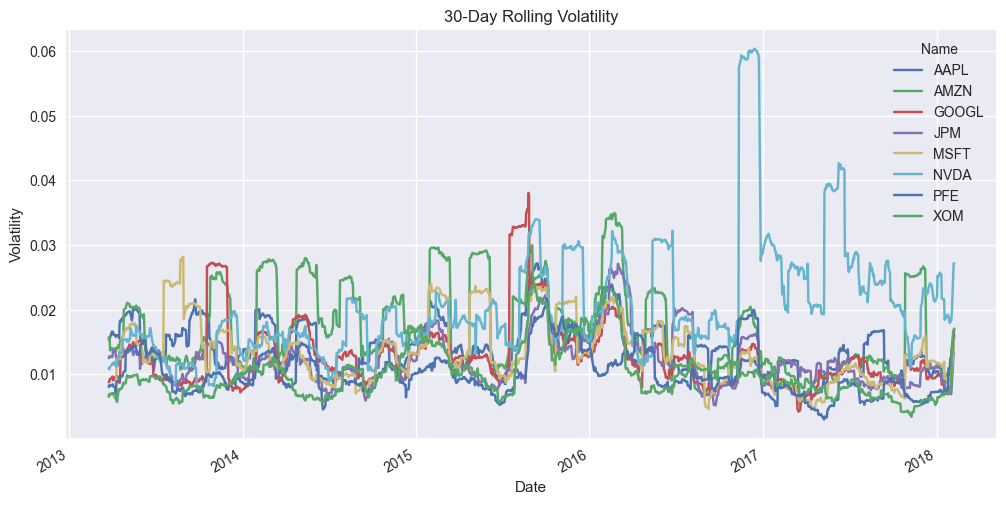

In [8]:
rolling_volatility = returns.rolling(window=30).std()

rolling_volatility.plot(figsize=(12,6))
plt.title("30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

## Correlation Analysis

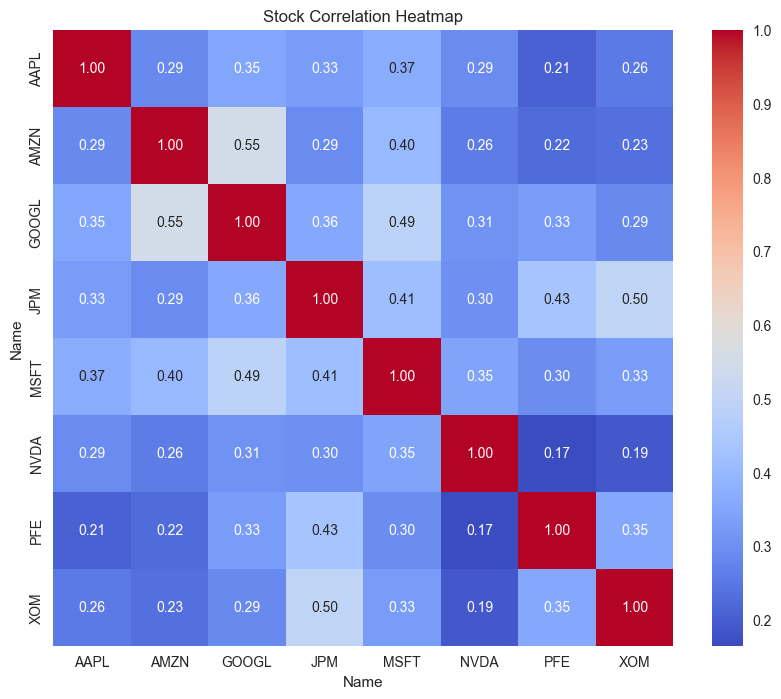

In [9]:
correlation_matrix = returns.corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Stock Correlation Heatmap")
plt.show()

## Portfolio Returns(Equal Weights)

In [11]:
weights = np.array([1/returns.shape[1]] * returns.shape[1])
portfolio_returns = returns.dot(weights)

portfolio_returns.head()

date
2013-02-11    0.002213
2013-02-12   -0.002597
2013-02-13    0.004554
2013-02-14    0.005708
2013-02-15   -0.002996
dtype: float64

## Value at Risk(VaR-95%)

In [16]:
VaR_95 = np.percentile(portfolio_returns,5)
VaR_95

np.float64(-0.01415808801311062)

## Monte Carlo Simulation (10,000 Runs)

In [17]:
mean_returns = returns.mean()
cov_matrix = returns.cov()

simulations = 10_000
days = 252

simulated_returns = np.random.multivariate_normal(
    mean_returns,
    cov_matrix,
    simulations
)

portfolio_simulated = simulated_returns.dot(weights)
portfolio_values = np.exp(portfolio_simulated * days)

## Monte Carlo Distribution

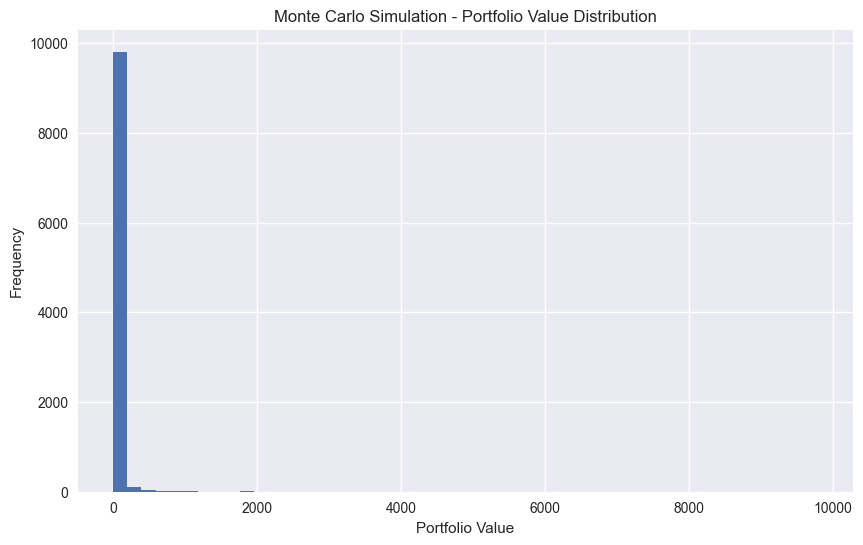

In [18]:
plt.figure(figsize=(10,6))
plt.hist(portfolio_values, bins=50)
plt.title("Monte Carlo Simulation - Portfolio Value Distribution")
plt.xlabel("Portfolio Value")
plt.ylabel("Frequency")
plt.show()
           

## Monte Carlo Risk Metrics

In [19]:
expected_value = np.mean(portfolio_values)
worst_case_5 = np.percentile(portfolio_values,5)

expected_value, worst_case_5

(np.float64(22.98437095438084), np.float64(0.02459906624802966))

## Save Outputs for Tableau

In [20]:
returns.to_csv("cleaned_returns.csv")
rolling_volatility.to_csv("rolling_volatility.csv")
correlation_matrix.to_csv("correlation_matrix.csv")

mc_df = pd.DataFrame({
    "Simulated_Portfolio_Value": portfolio_values
})

mc_df.to_csv("mmonte_carlo_results.csv", index=False)